<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Network (Mạng nơ-ron tích chập) và Computer Vision (Thị giác máy tính) với TensorFlow

Chúng ta đã đề cập các yếu tố cơ bản của TensorFlow và xây dựng một số mô hình để giải quyết nhiều bài toán khác nhau.

Giờ chúng ta sẽ đi vào chi tiết và xem làm thế nào để sử dụng một loại mạng nơ-ron - [mạng nơ-ron tích chập (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) cho thị giác máy tính (phát hiện pattern trong dữ liệu trực quan).

> 🔑 **Lưu ý:** Trong DL, có thể sử dụng nhiều loại cấu trúc mô hình cho các bài toán khác nhau. Chẳng hạn: chúng ta có thể sử dụng CNN để đưa ra dự đoán về dữ liệu hình ảnh hoặc/và dữ liệu văn bản. Tuy nhiên, thực tế một số cấu trúc thường hoạt động tốt hơn so với những cấu trúc khác.

Ví dụ, chúng ta có thể:
* Phân loại xem ảnh đồ ăn có pizza 🍕 hay bít-tết 🥩 (chúng ta sẽ thực hiện điều này)
* Phát hiện xem có vật thể nào xuất hiện trong hình không (có xe hơi nào lướt qua camera an ninh không)?

Trong notebook này, chúng ta sẽ theo dõi quy trình mô hình hóa TensorFlow mà chúng ta đã làm cho tới giờ, đồng thời tìm hiểu cách xây dựng và sử dụng CNN.

## Những điều chúng ta sẽ tìm hiểu

Cụ thể, chúng ta sẽ xem xét những điều sau với TensorFlow:

- Chọn tập dữ liệu để tiến hành
- Kiến trúc của CNN
- Một ví dụ đầu-cuối (end-to-end) nhanh chóng
- Các bước lập mô hình phân loại hình ảnh nhị phân với CNN
  - Tìm hiểu dữ liệu
  - Chuẩn bị dữ liệu để lập mô hình
  - Tạo mô hình CNN (bắt đầu với mô hình cơ sở)
  - Khớp mô hình (tìm pattern trong dữ liệu)
  - Đánh giá mô hình
  - Cải thiện mô hình
  - Đưa ra dự đoán với mô hình đã huấn luyện
- Các bước lập mô hình phân loại hình ảnh đa lớp với CNN
 - Tương tự như trên (lần này với một tập dữ liệu khác)

## Cách sử dụng notebook này

Các bạn có thể đọc qua các mô tả và code (tất cả sẽ chạy, trừ những cell mắc lỗi có chủ đích), nhưng có một lựa chọn tốt hơn.

Tự viết toàn bộ code.

Nghiêm túc đấy. Hãy tạo notebook mới và tự viết lại từng dòng. Kiểm tra xem bạn có thể thay đổi nó không và lý do cho điều đó.

Bạn không cần viết mô tả bằng văn bản nhưng tự viết lại code là một cách tuyệt vời để có trải nghiệm thực tiễn.

Đừng lo lắng nếu mắc sai sót, ai cũng đều mắc lỗi cả. Cách thực hiện tốt hơn và mắc ít lỗi hơn là **viết nhiều code hơn**.

## Lấy dữ liệu

Vì CNN hoạt động khá tốt với hình ảnh nên chúng ta sẽ bắt đầu với một tập dữ liệu hình ảnh để tìm hiểu thêm về chúng.

Hình ảnh lấy từ [tập dữ liệu Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), tập hợp 101 hạng mục khác nhau của 101,000 (1000 ảnh mỗi loại) hình ảnh thực tế về đồ ăn.

Chúng ta sẽ chỉ dùng 2 hạng mục là pizza 🍕 và steak 🥩 để xây bộ phân loại nhị phân.

> 🔑 **Lưu ý:** Cần thực hiện các bước tiền xử lý dữ liệu như chuyển ảnh vào các folder tập hợp con khác nhau, kiểm tra [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) để xem các bước này.

Hãy download file .zip tập con `pizza_steak` và giải nén.

In [2]:
import zipfile

# Download file zip hình ảnh pizza_steak
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Giải nén file đã tải
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

> 🔑 **Lưu ý:** Nếu bạn đang sử dụng Google Colab và runtime bị ngắt kết nối, có thể bạn sẽ phải download lại các file bằng cách chạy lại các cell trên.

## Kiểm tra dữ liệu (tìm hiểu dữ liệu)

Bước thiết yếu đầu tiên của bất kỳ dự án ML nào là tìm hiểu dữ liệu, tức là tiến hành nhiều trực quan hóa và quét folder để hiểu rõ dữ liệu mà chúng ta sẽ làm việc.

Hãy kiểm tra dữ liệu mà chúng ta vừa download.

Cấu trúc file được định dạng thành một dạng điển hình mà chúng ta có thể sử dụng để thao tác với hình ảnh.

Cụ thể:
*  Directory `train` chứa toàn bộ hình ảnh trong tập dữ liệu huấn luyện có các sub-directory, mỗi sub-directory được đặt tên theo một lớp nhất định có chứa hình ảnh của lớp đó.
* Directory `test` có cấu trúc tương tự như directory `train`.

```
Mẫu cấu trúc của file

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Hãy xem xét từng directory mà các bạn vừa download, sử dụng lệnh `ls` (viết tắt của list).


In [3]:
!ls pizza_steak

test  train


Chúng ta thấy có folder `train` và `test`.

Hãy xem có gì bên trong các folder này.

In [4]:
!ls pizza_steak/train/

pizza steak


Còn bên trong folder `steak` thì sao?

In [5]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

Có cả đống ảnh, nhưng chính xác là bao nhiêu?

> 🛠 **Thực hành:** Thử liệt kê thông tin tương tự cho directory `pizza` trong folder `test`.

In [6]:
import os

# Xem qua directory pizza_steak và liệt kê số file
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Một cách khác để tìm số lượng hình ảnh trong một file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# Lấy tên lớp (điều này hữu ích với danh sách lớp dài hơn)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # biến đường dẫn huấn luyện thành đường dẫn Python
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # tạo một danh sách class_names từ các sub-directory
print(class_names)

['pizza' 'steak']


Chúng ta có tập hợp 750 hình ảnh huấn luyện và 250 hình ảnh kiểm tra của pizza và steak.

Hãy xem xét một số hình ảnh.

> 🤔 **Lưu ý:** Bất cứ khi nào làm việc với dữ liệu, hãy trực quan hóa nó càng nhiều càng tốt, coi các bước đầu tiên của project là tìm hiểu dữ liệu. **Trực quan hóa**.

In [9]:
# Xem hình
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Thiết lập directory đích (chúng ta sẽ xem ảnh từ đây)
  target_folder = target_dir+target_class

  # Lấy đường dẫn hình ảnh ngẫu nhiên
  random_image = random.sample(os.listdir(target_folder), 1)

  # Đọc trong ảnh và vẽ biểu đồ bằng matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # hiển thị shape của hình ảnh

  return img

Image shape: (512, 508, 3)


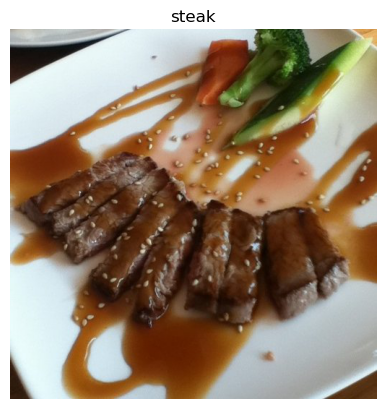

In [13]:
# Xem hình ngẫu nhiên từ tập dữ liệu huấn luyện
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Sau khi xem qua vô số hình từ các tập dữ liệu khác nhau, các bạn có thể hình dung những gì mà chúng ta đang thao tác.

Toàn bộ tập dữ liệu Food101 gồm các hình ảnh tương tự từ 101 lớp khác nhau.

Bạn có thể nhận ra chúng ta đang in shape của hình dọc theo hình đã vẽ, vì máy tính thấy ảnh ở dạng mảng lớn (tensor).



In [14]:
# Xem hình (thực ra chỉ là mảng lớn/tensor)
img

array([[[169, 165, 156],
        [166, 162, 153],
        [166, 162, 153],
        ...,
        [206, 152,  80],
        [212, 158,  86],
        [218, 164,  92]],

       [[177, 174, 165],
        [174, 171, 162],
        [174, 171, 162],
        ...,
        [233, 179, 105],
        [231, 177, 105],
        [230, 176, 104]],

       [[181, 178, 171],
        [179, 176, 169],
        [178, 175, 168],
        ...,
        [231, 179, 104],
        [226, 174,  99],
        [222, 170,  97]],

       ...,

       [[ 54,  32,  18],
        [ 54,  32,  18],
        [ 54,  32,  18],
        ...,
        [ 95,  59,  25],
        [ 95,  59,  25],
        [ 95,  59,  25]],

       [[ 54,  32,  18],
        [ 54,  32,  18],
        [ 54,  32,  18],
        ...,
        [ 95,  59,  25],
        [ 95,  59,  25],
        [ 95,  59,  25]],

       [[ 53,  31,  17],
        [ 53,  31,  17],
        [ 53,  31,  17],
        ...,
        [ 94,  58,  24],
        [ 95,  59,  25],
        [ 95,  59,  25]]

In [12]:
# Xem shape của hình
img.shape # trả về (width, height, colour channels)

(512, 512, 3)

Quan sát shape của hình ảnh kỹ hơn, các bạn sẽ thấy nó ở dạng `(Width, Height, Colour Channels)`.

Trong trường hợp này, width (chiều rộng) và height (chiều cao) thay đổi nhưng do chúng ta đang xử lý ảnh màu nên giá trị colour channel (kênh màu) luôn là 3, tức là 3 giá trị pixel khác nhau: [red, green và blue (RGB)](https://en.wikipedia.org/wiki/RGB_color_model).

Các bạn cũng nhận thấy tất cả các giá trị trong mảng `img` là từ 0 đến 255 vì đó là phạm vi của các giá trị red, blue và green.

Ví dụ: một pixel có giá trị `red=0, green=0, blue=255` sẽ trông rất giống màu xanh dương.

Do vậy khi xây dựng mô hình để phân biệt ảnh `pizza` và ảnh `steak`, nó sẽ tìm các pattern trong các giá trị điểm ảnh đó, xác định xem từng lớp trông như thế nào.

> 🔑 **Lưu ý:** Như đã thảo luận trước đó, nhiều mô hình học máy, bao gồm cả mạng nơ-ron đều ưu tiên các giá trị hoạt động trong khoảng 0-1. Như vậy, một trong những bước tiền xử lý phổ biến nhất để thao tác với hình ảnh là **chia tỷ lệ** (hay còn gọi là **chuẩn hóa**) các giá trị điểm ảnh bằng cách chia mảng ảnh cho 255.

In [15]:
# Nhận các giá trị điểm ảnh trong khoảng 0-1
img/255. 

array([[[0.6627451 , 0.64705882, 0.61176471],
        [0.65098039, 0.63529412, 0.6       ],
        [0.65098039, 0.63529412, 0.6       ],
        ...,
        [0.80784314, 0.59607843, 0.31372549],
        [0.83137255, 0.61960784, 0.3372549 ],
        [0.85490196, 0.64313725, 0.36078431]],

       [[0.69411765, 0.68235294, 0.64705882],
        [0.68235294, 0.67058824, 0.63529412],
        [0.68235294, 0.67058824, 0.63529412],
        ...,
        [0.91372549, 0.70196078, 0.41176471],
        [0.90588235, 0.69411765, 0.41176471],
        [0.90196078, 0.69019608, 0.40784314]],

       [[0.70980392, 0.69803922, 0.67058824],
        [0.70196078, 0.69019608, 0.6627451 ],
        [0.69803922, 0.68627451, 0.65882353],
        ...,
        [0.90588235, 0.70196078, 0.40784314],
        [0.88627451, 0.68235294, 0.38823529],
        [0.87058824, 0.66666667, 0.38039216]],

       ...,

       [[0.21176471, 0.1254902 , 0.07058824],
        [0.21176471, 0.1254902 , 0.07058824],
        [0.21176471, 0

## Kiến trúc (điển hình) của mạng nơ-ron tích chập

CNN không khác so với các mạng nơ-ron học sâu khác, chúng được tạo bằng nhiều cách. Dưới đây là một số thành phần mà chúng ta kỳ vọng sẽ thấy trong CNN truyền thống.


Thành phần của một CNN:

| **Siêu tham số/Kiểu Layer** | **Chức năng** | **Giá trị điển hình** |
| ----- | ----- | ----- |
| Ảnh đầu vào | Hình ảnh mục tiêu mà bạn muốn khám phá pattern| Bất cứ thứ gì mà bạn chụp hình (quy video) |
| Lớp đầu vào | Lấy hình ảnh mục tiêu và tiền xử lý cho các lớp tiếp theo | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Lớp tích chập | Trích xuất/tìm hiểu các đặc trưng quan trọng nhất từ hình ảnh mục tiêu | Nhiều, có thể tạo với [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X có thể là nhiều giá trị) |
| Kích hoạt ẩn | Thêm phi tuyến tính vào các đặc trưng đã tìm hiểu (không phải đường thẳng) | Thường là ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Lớp gộp | Giảm kích thước của các đặc trưng hình ảnh đã tìm hiểu | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) hoặc Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Lớp được kết nối đầy đủ | Tinh chỉnh thêm các đặc trưng đã tìm hiểu từ lớp tích chập | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Lớp đầu ra | Lấy các đặc trưng đã tìm hiểu và xuất chúng ở dạng nhãn mục tiêu | `output_shape = [number_of_classes]` (ví dụ: 3 cho pizza, steak hoặc sushi)|
| Kích hoạt đầu ra | Thêm phi tuyến tính vào lớp đầu ra | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (phân loại nhị phân) hoặc [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

Cách xếp chồng chúng với nhau:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*Ví dụ đơn giản về cách xếp chồng các lớp trên thành CNN. Lưu ý có thể sắp xếp hoặc xếp lại các lớp tích chập và lớp gộp thành nhiều dạng khác nhau.* 

## Ví dụ đầu cuối (End-to-end)

Chúng ta kiểm tra dữ liệu và thấy có 750 hình ảnh huấn luyện và 250 hình ảnh kiểm tra mỗi lớp, chúng đều có shape khác nhau.

Hãy bắt đầu thôi!

Qua tài liệu của [tác giả tập dữ liệu ban đầu](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), chúng ta thấy họ sử dụng [mô hình học máy Random Forest](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) và dự đoán chính xác trung bình 50.76% các hình ảnh thức ăn khác nhau trong tập dữ liệu đó.

Từ giờ, 50.76% sẽ là baseline (thước đo cơ sở) của chúng ta.

> 🔑 **Lưu ý:** **Baseline** là hệ số hoặc thước đo đánh giá mà chúng ta sẽ thử, thường thì chúng ta sẽ bắt đầu với một mô hình đơn giản, tạo baseline và cố tăng độ phức tạp của mô hình. Một cách học ML thú vị là tìm một số loại tài liệu lập mô hình với kết quả đã công bố và thử vượt qua nó.

Code trong cell sau sao chép và lập mô hình tập dữ liệu `pizza_steak` theo cách end-to-end với CNN sử dụng các thành phần đã liệt kê ở trên.

Có nhiều thứ mà bạn sẽ không nhận ra, hãy tự lướt qua code và xem có thể tìm hiểu những gì đang diễn ra không.

Chúng ta sẽ xem xét từng bước trong notebook.

Để tham khảo, mô hình mà chúng ta đang dùng sẽ sao chép TinyVGG - kiến trúc thị giác máy tính thức cung ứng cho [CNN explainer](https://poloclub.github.io/cnn-explainer/).

> 📖 **Nguồn:** kiến trúc chúng ta đang dùng dưới đây là một phiên bản thu nhỏ của [VGG-16](https://arxiv.org/abs/1505.06798), mạng nơ-ron tích chập đứng thứ 2 trong [cuộc thi phân loại ImageNet 2014](http://image-net.org/).

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Thiết lập seed
tf.random.set_seed(42)

# Tiền xử lý dữ liệu (nhận toàn bộ giá trị điểm ảnh trong khoảng 0-1, cũng gọi là co giãn/chuẩn hóa)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Thiết lập train/test directory
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import dữ liệu từ directory và biến nó thành batch
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # số hình ảnh để xử lý tại một thời điểm
                                               target_size=(224, 224), # chuyển toàn bộ hình thành 224 x 224
                                               class_mode="binary", # loại bài toán mà chúng ta đang giải
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Tạo mô hình CNN (tương tự như Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # cũng có thể là (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # lớp đầu tiên chỉ định input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size cũng có thể là (2, 2)
                            padding="valid"), # padding cũng có thể là 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # đầu ra kích hoạt nhị phân
])

# Biên dịch mô hình
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2022-10-10 10:44:45.343742: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 10:44:45.344690: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 120s 3s/step - loss: 0.5706 - accuracy: 0.6967 - val_loss: 0.4090 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 113s 2s/step - loss: 0.4283 - accuracy: 0.7980 - val_loss: 0.3953 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 112s 2s/step - loss: 0.3949 - accuracy: 0.8233 - val_loss: 0.3318 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.3589 - accuracy: 0.8433 - val_loss: 0.3225 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 112s 2s/step - loss: 0.3342 - accuracy: 0.8547 - val_loss: 0.3647 - val_accuracy: 0.8500


> 🤔 **Lưu ý:** Cell trên tốn nhiều hơn ~12 giây mỗi epoch, có thể là các bạn đang không dùng GPU accelerator. Nếu bạn đang sử dụng Colab notebook, có thể truy cập GPU accelerator bằng cách vào Runtime -> Change Runtime Type -> Hardware Accelerator và chọn "GPU". Sau đó, chạy lại toàn bộ các cell vì việc thay đổi kiểu runtime khiến Colab thiết lập lại.





Tuyệt! Sau mỗi 5 epoch, mô hình lại vượt qua baseline - độ chính xác 50.76% (mô hình đạt độ chính xác ~85% trên tập huấn luyện và tập kiểm tra).

Tuy nhiên, mô hình chỉ xem xét  một bài toán nhị phân hơn là toàn bộ 101 lớp trong tập dữ liệu Food101, do đó chúng ta không thể trực tiếp so sánh các phép đo này. Như vậy, kết quả cho tới giờ thể hiện mô hình đang học được gì đó.

> 🛠 **Thực hành:** Xem qua từng khối code chính trong cell trên, bạn nghĩ mỗi khối đang thực hiện những gì? Nếu không chắc chắn, không sao cả, chúng ta sẽ xem xét điều này sớm thôi. Trong lúc đó, hãy dành 10 phút thử [website CNN explainer](https://poloclub.github.io/cnn-explainer/). Các bạn có nhận ra điều gì về tên lớp ở đầu trang web không?


Chúng ta đã khớp mô hình nên hãy kiểm tra cấu trúc của nó.

In [17]:
# Kiểm tra các lớp của mô hình
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Bạn nhận thấy gì về tên lớp của `model_1` và tên lớp ở đầu [website CNN explainer](https://poloclub.github.io/cnn-explainer/)?

Tiết lộ một chút: chúng ta đã sao chép chính xác cấu trúc họ dùng cho mô hình mô phỏng.

Hãy xem đi! **Bạn đã bắt đầu sao chép mô hình mà bạn đang sử dụng rồi.** 

Một số thứ mới mà chúng ta vẫn chưa nhắc tới gồm: 
* Lớp [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) và tham số `rescale`: Tiền xử lý dữ liệu (nhận toàn bộ giá trị điểm ảnh trong khoảng 0-1, cũng gọi là co giãn/chuẩn hóa)
  * *Lớp này thực hiện một flow preprocessing ảnh. Với tham số `rescale=1/255` dùng để chuẩn hoá ảnh, đưa tất cả các ảnh về khoảng 0-1*
  
<br>

* Phương thức [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory): Import dữ liệu từ directory và biến nó thành batch
  * Tham số `batch_size` : *Kích thước mỗi batch*
  * Tham số `target_size`: *Size của hình ảnh đầu ra sau quá trình preprocessing này.*

<br>

* [`Conv2D` layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (và các tham số đi kèm)
  * `filters=10` : *số lượng filter*
  * `kernel_size=3`, # cũng có thể là (3, 3): *size của mỗi filter là 3x3*
  * `activation="relu"`, : *Activation sau mỗi filter là relu*
  * `input_shape` : *Giá trị này phải điền lần đầu, vì các layer sau nối tiếp sau layer trước, do đó nó có thể tự biết input size*

<br>

* [`MaxPool2D` layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) (và các tham số của chúng).
  * `pool_size=2`, # pool_size cũng có thể là (2, 2), *Với pooling layer, thì con số này chỉ ra là size của pool sẽ là 2x2 và stride = 2 (f=2, s=2)*
  * `padding="valid"`, # padding cũng có thể là 'same' *padding = valid nghĩa là, size của output không nhất thiết bằng với size của input, tương đương với việc padding = 0, do đó nó mới có ý nghĩa là giảm số lượng features. Còn nếu padding = same, nghĩa là size của output phải bằng với size của input, do đó padding là một số khác 0, tuỳ vào kích thước pool_size*
  
  
<br>

* Tham số `steps_per_epoch` và `validation_steps` trong hàm `fit()` 
  * `epochs=5` : Số lượng các epochs 
  * `steps_per_epoch=len(train_data)`: là số step training sau mỗi epoch, mỗi step dùng 1 batch, mà train_data được tạo ra từ `flow_from_directory()`, đã được biến thành list các batch. Do đó, `steps_per_epoch=len(train_data)` sẽ đưa quá trình training đi dùng hết số dữ liệu sẵn có.
  * `validation_steps=len(valid_data)`: cũng giống steps_per_epoch, `validation_steps=len(valid_data)` đảm bảo toàn bộ lượng data test đều được dùng

Trước khi tìm hiểu kỹ những yếu tố trên, hãy xem điều gì sẽ xảy ra nếu chúng ta thử khớp mô hình mà chúng ta đã làm thực hiện trước đó với dữ liệu.


## Sử dụng mô hình tương tự trước đó

Để minh họa cách điều chỉnh mô hình cho nhiều bài toán khác nhau, hãy xem mô hình phân loại nhị phân đã xây dựng trước đó hoạt động như thế nào với dữ liệu.

> 🔑 **Lưu ý:** Nếu bạn chưa xem notebook phân loại trước đó, không vấn đề gì, chúng ta sẽ đưa vào một cấu trúc 4 layer đơn giản để phân tách các chấm được sao chép từ [môi trường TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

Chúng ta có thể sử dụng các tham số giống trong mô hình trước, trừ việc thay đổi:
* **Dữ liệu** - giờ chúng ta làm việc với hình ảnh chứ không phải các chấm.
* **Input shape** - cần cho mạng nơ-ron biết shape của hình ảnh mà chúng ta đang thao tác.
  * Thực tế là sẽ reshape tất cả hình ảnh về một kích thước. Trong trường hợp này, chúng ta sẽ đặt lại kích thước ảnh là `(224, 224, 3)`, tức là chiều cao và chiều rộng 224 pixel, depth là 3 cho kênh màu red, green và blue.

In [18]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một mô hình sao chép lại mô hình TensorFlow Playground
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # tầng kết nối dày đặc kỳ vọng vectơ 1 chiều làm đầu vào
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_2 = model_2.fit(train_data, # sử dụng cùng dữ liệu huấn luyện đã tạo ở trên
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # sử dụng cùng dữ liệu kiểm định đã tạo ở trên
                        validation_steps=len(valid_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 10s 219ms/step - loss: 0.8217 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Mô hình đã chạy rồi nhưng dường như nó không học được gì cả. Nó chỉ đạt độ chính xác 50% trên các tập huấn luyện và tập kiểm tra, điều này ở bài toán phân loại nhị phân tương tự như việc đoán vậy.

Hãy xem cấu trúc mô hình.

In [19]:
# Kiểm tra cấu trúc của mô hình thứ hai
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Một trong những điều đáng chú ý nhất ở đây là `model_2` có số lượng tham số lớn hơn rất nhiều so với `model_1`.

`model_2` có 602,141 tham số có thể huấn luyện, trong khi `model_1` chỉ có 31,101. Dù vậy, `model_1` vẫn hoạt động tốt hơn `model_2`.

> 🔑 **Lưu ý:** Các bạn có thể nghĩ tham số huấn luyện là *pattern mà mô hình học được từ dữ liệu*. Chúng ta thường nghĩ nhiều hơn là tốt hơn. Điều này đúng trong một số trường hợp. Tuy nhiên, ở trường hợp này, khác biệt ở đây là hai phong cách khác nhau của mô hình mà chúng ta đang sử dụng: trong khi một chuỗi các tầng kết nối dày đặc có nhiều tham số có thể học khác nhau kết nối với nhau, làm cho số lượng pattern có thể học nhiều hơn thì **CNN tìm cách sắp xếp và học những pattern quan trọng nhất trong một hình ảnh**. Cho nên kể cả khi có ít tham số có thể học được trong CNN thì chúng cũng hữu ích trong việc giải mã giữa **các đặc trưng** khác nhau của hình ảnh.

Mô hình trước đó không hoạt động, bạn có ý tưởng nào để khiến nó hoạt động không?

Có nên tăng số layer không?

Hay tăng số nơ-ron ở mỗi layer?

Cụ thể, chúng ta sẽ tăng số nơ-ron (hay đơn vị ẩn) ở mỗi dense layer từ 4 thành 100 và thêm một layer bổ sung.

> 🔑 **Lưu ý:** Thêm layer bổ sung hoặc tăng số nơ-ron ở mỗi layer thường là được coi là tăng **độ phức tạp** của mô hình.

In [20]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một mô hình tương tự model_1 nhưng thêm một layer bổ sung và tăng số đơn vị ẩn ở mỗi layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layer kỳ vọng vectơ 1 chiều làm đầu ra 
  tf.keras.layers.Dense(100, activation='relu'), # tăng số lượng nơ-ron từ 4 lên 100 (cho mỗi layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # thêm 1 layer bổ sung
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 18s 383ms/step - loss: 2.6558 - accuracy: 0.6367 - val_loss: 1.6336 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 17s 362ms/step - loss: 1.0625 - accuracy: 0.7000 - val_loss: 0.4725 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 17s 364ms/step - loss: 0.7539 - accuracy: 0.7207 - val_loss: 0.4603 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 17s 358ms/step - loss: 0.4560 - accuracy: 0.7973 - val_loss: 0.5543 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 16s 351ms/step - loss: 0.6611 - accuracy: 0.7320 - val_loss: 0.4268 - val_accuracy: 0.7980


Hình như mô hình đang học trở lại. Nó đạt được độ chính xác ~70% trên cả tập huấn luyện và tập kiểm định.

Cấu trúc mô hình trông như thế nào?

In [ ]:
# Kiểm tra cấu trúc model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Số lượng tham số có thể huấn luyện thậm chí còn tăng nhiều hơn so với `model_2`. Dù có số lượng gần 500 lần, `model_3` cũng không hoạt động tốt như `model_1`.

Điều này cho thấy khả năng của CNN dù sử dụng ít tham số hơn.

## Phân loại nhị phân: chia nhỏ bài toán

Chúng ta sẽ thực hiện các bước:

1. Tìm hiểu dữ liệu (trực qua hóa...)
2. Tiền xử lý dữ diệu (chuẩn bị cho mô hình)
3. Tạo mô hình (bắt đầu với baseline)
4. Khớp mô hình
5. Đánh giá mô hình
6. Điều chỉnh các tham số khác nhau và cải thiện mô hình (thử vượt trên baseline)
7. Lặp lại cho tới khi thỏa mãn

Hãy đi qua từng bước một.

### 1. Import và tìm hiểu dữ liệu

Bất kể các bạn đang xử lý dữ liệu nào cũng nên trực quan hóa ít nhất 10-100 mẫu để bắt đầu xây dựng mô hình dữ liệu riêng của mình.

Trong trường hợp này, chúng ta sẽ nhận thấy hình ảnh về bít-tết có xu hướng có màu tối hơn trong khi ảnh pizza có shape hình tròn dễ thấy ở giữa. Chúng có thể là các pattern mà mạng nơ-ron tiếp nhận.

Các bạn cũng thấy một số dữ liệu lộn xộn (chẳng hạn: có nhãn sai) và bắt đầu xem xét các cách để sửa chữa.

> 📖 **Nguồn:** Truy cập [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) để xem cách dữ liệu này được xử lý thành định dạng mà chúng ta đang dùng.

Nếu cell trực quan dưới đây không hoạt động, hãy đảm bảo bạn có dữ liệu bằng cách bỏ các chú thích cell bên dưới.

In [ ]:
# import file zip

# # Download file zip hình pizza_steak 
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Giải nén file đã download
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


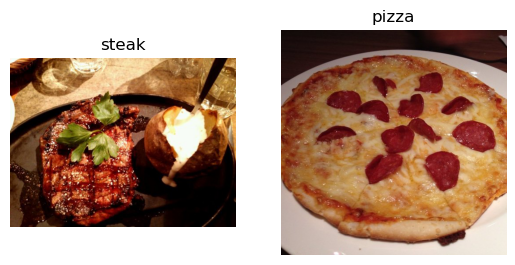

In [21]:
# Hiển thị dữ liệu (cần hàm 'view_random_image' ở trên)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

Một trong những bước quan trọng nhất của một dự án ML là tạo tập huấn luyện và tập kiểm tra.

Trong trường hợp này, dữ liệu đã được chia thành tập huấn luyện và tập kiểm tra. Một lựa chọn khác là tạo tập kiểm định, hãy nói về điều này sau. 

Với dự án phân loại hình ảnh, cần chia tách dữ liệu thành các directory `train` và `test` với các folder con cho mỗi class.

Hãy bắt đầu với việc xác định đường dẫn directory train/test.

In [22]:
# Xác định đường dẫn directory train/test
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Bước tiếp theo là biến dữ liệu thành các **batch**.

**Batch** là một tập con của tập dữ liệu mà mô hình xem xét trong quá trình huấn luyện. Chẳng hạn: thay vì xem xét 10,000 hình ảnh một lúc và cố tìm ra các pattern, mô hình sẽ chỉ xem xét 32 hình một lúc.

Một số lý do cho điều này:
* 10,000 hình (hoặc nhiều hơn) có thể không khớp với dung lượng bộ xử lý (GPU) của bạn.
* Việc cố gắng học các pattern một lúc trong 10,000 hình có thể khiến mô hình không thể học tốt.

Tại sao là 32?

[Batch có size 32 tốt cho sức khỏe của bạn](https://twitter.com/ylecun/status/989610208497360896?s=20). 

Không nghiêm trọng như vậy, có nhiều kích thước batch khác nhau mà chúng ta có thể sử dụng nhưng size 32 được chứng minh là có hiệu quả trong nhiều trường hợp và thường là kích thước mặc định cho nhiều hàm tiền xử lý dữ liệu.

Để biến dữ liệu thành các batch, trước tiên chúng ta sẽ tạo instance của [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) cho mỗi tập dữ liệu.


In [23]:
# Tạo bộ sinh dữ liệu huấn luyện và kiểm tra và chia tỷ lệ lại dữ liệu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

Lớp `ImageDataGenerator` giúp chúng ta chuẩn bị hình ảnh thành batch cũng như thực hiện các phép biến đổi trên chúng khi chúng được đưa vào mô hình.

Các bạn có thể sẽ nhận thấy tham số `rescale`, là ví dụ về phép biến đổi mà chúng ta đang tiến hành.

Các bạn còn nhớ cách import hình và các giá trị điểm ảnh trong khoảng 0-255 không?

Tham số `rescale` cùng với `1/255.` chỉ việc "chia tất cả các giá trị điểm ảnh cho 255". Điều này dẫn tới toàn bộ hình được import và các giá trị điểm ảnh của hình được chuẩn hóa (chuyển thành khoảng 0-1).

> 🔑 **Lưu ý:** Tham khảo [`ImageDataGenerator` documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) để tìm hiểu thêm về các lựa chọn biến đổi như tăng cường dữ liệu (sẽ thấy sau).

Chúng ta đã có một vài ImageDataGenerator instance, hãy load hình ảnh từ các directory tương ứng với phương thức [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory).

In [24]:
# Biến ảnh thành các batch
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Tuyệt! Dường như tập huấn luyện có 1500 hình ảnh thuộc về 2 class (pizza và steak) và tập kiểm tra có 500 hình cũng thuộc về 2 class.

Một số điều ở đây:
* Do cách cấu trúc của directory nên có thể suy ra các lớp theo tên của subdirectory trong `train_dir` và `test_dir`. 
* Tham số `target_size` xác định kích thước đầu vào của hình ảnh ở định dạng `(height, width)`.
* Giá trị `class_mode` của `'binary'` xác định loại bài toán phân loại. Nếu có nhiều hơn 2 lớp thì sẽ dùng `'categorical'`.
* `batch_size` xác định có bao nhiêu hình ở mỗi batch, chúng ta đã dùng size 32 làm mặc định.

Hãy xem các hình và nhãn theo batch bằng cách kiểm tra object `train_data`.

In [26]:
# Lấy mẫu batch dữ liệu huấn luyện
images, labels = train_data.next() # lấy batch 'next' của images/labels
len(images), len(labels)

(32, 32)

Có vẻ như các hình và nhãn thuộc batch 32.

Hãy xem các hình trông như thế nào.

In [27]:
# Lấy 2 hình đầu tiên
images[:2], images[0].shape

(array([[[[0.2901961 , 0.24313727, 0.28235295],
          [0.2901961 , 0.24313727, 0.28235295],
          [0.2901961 , 0.24313727, 0.28235295],
          ...,
          [0.22352943, 0.18431373, 0.21960786],
          [0.227451  , 0.18823531, 0.22352943],
          [0.22352943, 0.18431373, 0.21960786]],
 
         [[0.2901961 , 0.24313727, 0.28235295],
          [0.29411766, 0.24705884, 0.28627452],
          [0.29803923, 0.2509804 , 0.2901961 ],
          ...,
          [0.2392157 , 0.20000002, 0.23529413],
          [0.24313727, 0.20392159, 0.2392157 ],
          [0.23137257, 0.19215688, 0.227451  ]],
 
         [[0.28235295, 0.23529413, 0.27450982],
          [0.28627452, 0.2392157 , 0.2784314 ],
          [0.28627452, 0.2392157 , 0.2784314 ],
          ...,
          [0.2392157 , 0.20000002, 0.23529413],
          [0.23137257, 0.19215688, 0.227451  ],
          [0.23529413, 0.19607845, 0.23137257]],
 
         ...,
 
         [[0.8980393 , 0.86666673, 0.8588236 ],
          [0.89803

Do tham số `rescale` nên bây giờ các hình nằm trong tensor có shape `(224, 224, 3)` với các giá trị trong khoảng 0-1.
 
Vậy còn các nhãn?

In [28]:
# Xem batch đầu tiên của labels
labels

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

Do tham số  `class_mode` là `'binary'` nên các nhãn sẽ là `0` (pizza) hoặc `1` (steak).

Bây giờ dữ liệu đã sẵn sàng, mô hình sẽ thử tìm các pattern giữa image tensor và label (nhãn).

### 3. Tạo mô hình (bắt đầu với baseline)

Có thể các bạn đang thắc mắc cấu trúc mô hình mặc định trông như thế nào.

Thật ra, có nhiều câu trả lời khác nhau cho câu hỏi này.

Phương pháp đơn giản cho mô hình computer vision là sử dụng kiến trúc mô hình nào hoạt động tốt nhất trong [ImageNet](https://www.image-net.org/) (một tập hợp lớn gồm vô số hình ảnh để đánh giá các mô hình computer vision khác nhau).


Tuy nhiên, lúc đầu nên xây một mô hình nhỏ hơn để thu được kết quả baseline để bạn cố gắng cải thiện.

> 🔑 **Lưu ý:** Trong DL, mô hình nhỏ hơn thường đề cập tới mô hình ít tầng hơn so với mô hình state-of-art (SOTA). Ví dụ: mô hình nhỏ hơn có thể có 3-4 tầng trong khi mô hình state-of-art như ResNet50 có thể có trên 50 tầng.

Trong trường hợp này, hãy lấy phiên bản mô hình nhỏ hơn trên [website CNN explainer](https://poloclub.github.io/cnn-explainer/) (`model_1` ở trên) và xây một mạng nơ-ron tích chập 3 tầng.

In [29]:
# Khiến việc tạo mô hình dễ dàng hơn một chút
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Tạo mô hình (đây có thể là mô hình baseline - CNN 3layer)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (chỉ định input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (chỉ định output shape)
])

Kiến trúc CNN đơn giản đã sẵn sàng hoạt động.

Nó tuân theo cấu trúc CNN điển hình của:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Hãy thảo luận một số thành phần của `Conv2D` layer:

* "`2D`" tức là đầu vào là 2 chiều (chiều cao và chiều rộng), dù chúng có 3 kênh màu nhưng tích chập vẫn chạy riêng ở mỗi kênh.
* `filters` - là số lượng "feature extractor" sẽ chuyển qua các hình ảnh.
* `kernel_size` - kích thước của bộ lọc, ví dụ: `kernel_size` có `(3, 3)` (hoặc chỉ 3) nghĩa là mỗi bộ lọc sẽ có kích thước 3x3, mỗi lần nó sẽ xem không gian 3x3 pixel. Kernel càng nhỏ thì nó càng trích xuất nhiều đặc trưng chi tiết hơn.
* `stride` - số lượng pixel mà `filter` sẽ di chuyển khi nó bao quát hình ảnh. `stride` = 1 tức là bộ lọc sẽ di chuyển từng pixel một. `stride` = 2 tức là nó sẽ di chuyển 2 pixel cùng một lúc.
* `padding` - - có thể là `'same'` hoặc `'valid'`, `'same'`  thêm 0 bên ngoài hình ảnh để đầu ra của tầng tích chập tương tự như đầu vào, trong đó `'valid'` (mặc định) sẽ loại bỏ các pixel dư thừa mà `filter` không khớp (ví dụ: chiều rộng 224 pixel chia cho kernel size là 3 (224/3 = 74.6) nghĩa là một pixel đơn lẻ sẽ bị cắt bỏ phần cuối.

"Đặc trưng" là gì?

**Đặc trưng (feature)** có thể coi là bất kỳ phần quan trọng nào của một hình ảnh. Ví dụ: trong trường hợp này, đặc trưng có thể là hình tròn của pizza hoặc các cạnh gồ ghề bên ngoài bít-tết.

Lưu ý là chúng ta không thể định nghĩa các **đặc trưng** này, mô hình sẽ học chúng khi nó áp dụng các bộ lọc khác nhau trên hình ảnh.

> 📖 **Nguồn:** For a great demonstration of these in action, be sure to spend some time going through the following: Để mô phỏng chúng trong thực tế, hãy dành một chút thời gian xem qua:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - tổng quan về nhiều khái niệm mà chúng ta đang tái tạo lại ở đây với code.
  * [Hướng dẫn về convolutional arithmetic trong deep learning](https://arxiv.org/pdf/1603.07285.pdf) - giới thiệu hiện tượng toán học đằng sau CNN.
  * [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723) để xem thêm diễn giải về padding.

Mô hình đã sẵn sàng, hãy biên dịch nó.

In [32]:
# Biên dịch mô hình
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Do chúng ta đang giải bài toán phân loại nhị phân (pizza với steak) nên hàm `loss` mà chúng ta đang sử dụng là `'binary_crossentropy'`; nếu là bài toán phân loại đa lớp, chúng ta sẽ dùng `'categorical_crossentropy'`.

Chúng ta sẽ dùng thuật toán tối ưu Adam với toàn bộ thiết lập mặc định, còn phép đo đánh giá là accuracy.

### 4. Khớp mô hình

Mô hình đã được biên dịch, giờ chúng ta sẽ khớp nó.

Các bạn sẽ thấy hai tham số mới ở đây:
* `steps_per_epoch` - số lượng batch mà mô hình sẽ đi qua mỗi epoch, trong trường hợp này, chúng ta muốn mô hình đi qua toàn bộ batch nên nó bằng với độ dài của `train_data`  (1500 hình trong batch 32 = 1500/32 = ~47 bước)
* `validation_steps` - tương tự như trên, trừ tham số `validation_data` (500 hình ảnh kiểm tra trong batch 32 = 500/32 = ~16 bước)

In [33]:
# Kiểm tra độ dài của bộ sinh dữ liệu huấn luyện và kiểm tra
len(train_data), len(test_data)

(47, 16)

In [34]:
# Khớp mô hình
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 97s 2s/step - loss: 1.0494 - accuracy: 0.6873 - val_loss: 0.3953 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.4080 - accuracy: 0.8273 - val_loss: 0.3603 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 96s 2s/step - loss: 0.3045 - accuracy: 0.8853 - val_loss: 0.3771 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 94s 2s/step - loss: 0.2074 - accuracy: 0.9287 - val_loss: 0.3947 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 91s 2s/step - loss: 0.0905 - accuracy: 0.9793 - val_loss: 0.4620 - val_accuracy: 0.8260


### 5. Đánh giá mô hình

Có vẻ mô hình đang học được gì đó.

Hãy kiểm tra training curve.

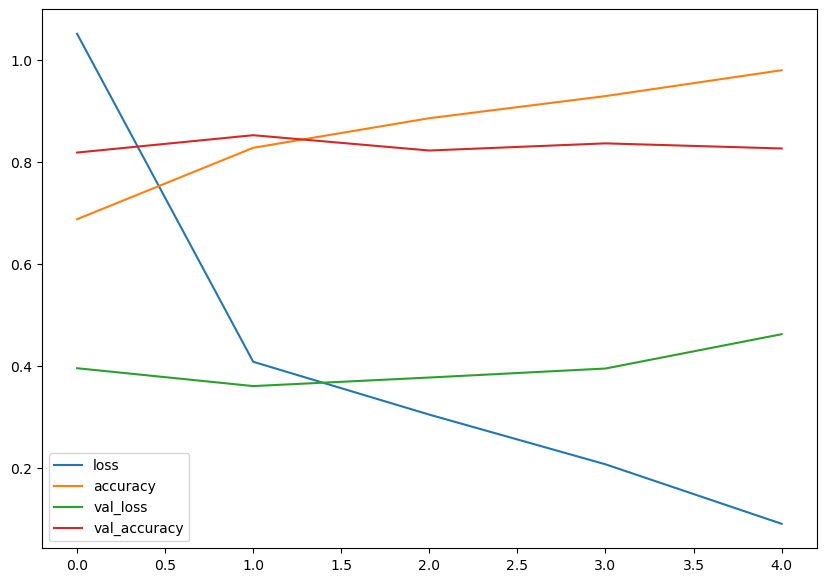

In [35]:
# Vẽ training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Đánh giá theo loss curve, dường như mô hình đang **overfitting** tập huấn luyện.

> 🔑 **Lưu ý:** Khi **validation loss bắt đầu tăng**, nó chắc chắn sẽ overfitting tập huấn luyện. Điều này nghĩa là nó sẽ học các pattern trong tập huấn luyện *rất tốt*, do đó khả năng khái quát hóa thành dữ liệu không nhìn thấy sẽ bị giảm đi.

Để tìm hiểu thêm về chất lượng mô hình, hãy phân tách accuracy và loss curve.

In [36]:
# Vẽ biểu đồ dữ liệu kiểm định và huấn luyện riêng biệt
def plot_loss_curves(history):
  """
  Trả về loss curve riêng biệt cho các phép đo huấn luyện và kiểm định.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Vẽ loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Vẽ accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

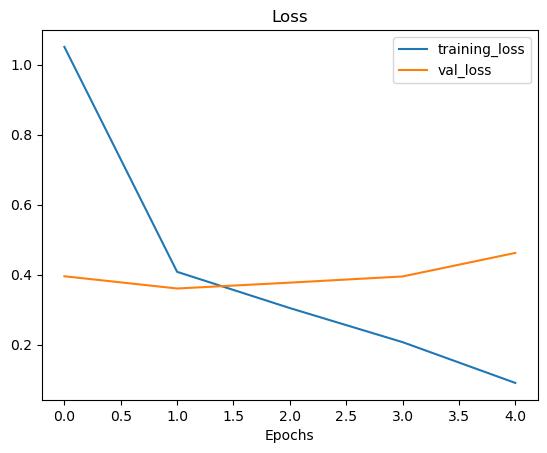

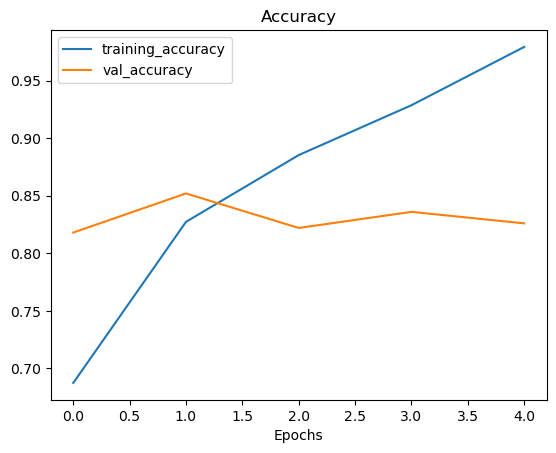

In [37]:
# Kiểm tra loss curve của model_4
plot_loss_curves(history_4)

Vị trí lý tưởng cho 2 đồ thị này là nối tiếp nhau. Nếu xảy ra bất cứ điều gì thì validation curve sẽ nằm dưới training curve một chút. Nếu có khoảng cách lớn giữa training curve và validation curve thì mô hình có thể sẽ bị overfitting.

In [38]:
# Kiểm tra kiến trúc mô hình
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Điều chỉnh tham số của mô hình

Việc khớp mô hình học máy gồm 3 bước:
0. Tạo baseline.
1. Vượt quan baseline bằng cách overfitting mô hình lớn hơn.
2. Giảm overfitting.

Như vậy chúng ta đã đi quan bước 0 và bước 1.

Chúng ta cũng có thể thử thêm một số thứ để overfit mô hình hơn:
* Tăng số tầng tích chập.
* Tăng số bộ lọc tích chập.
* Thêm một tầng kết nối dày đặc khác vào đầu ra của tầng được làm phẳng. 

Tuy nhiên, chúng ta sẽ tập trung vào việc làm cho các training curve gióng hàng với nhau, nói cách khác, chúng ta sẽ triển khai bước 2.

Tại sao việc giảm overfitting lại quan trọng?

Khi mô hình thực hoạt động tốt trên dữ liệu huấn luyện và hoạt động kém trên dữ liệu không nhìn thấy thì nó không có nhiều tác dụng lắm nếu chúng ta muốn dùng nó trong thực tế.

Giả sử chúng ta định tạo một ứng dụng phân loại pizza với bit-tết, mô hình hoạt động rất tốt trên dữ liệu huấn luyện nhưng khi người dùng thử sử dụng, họ lại không nhận được kết quả tốt về hình ảnh thức ăn; liệu đây có phải một thử nghiệm tốt không?

Không hẳn...

Vì vậy, với một số mô hình sắp xây, chúng ta sẽ điều chỉnh số lượng tham số và tìm hiểu training curve trong quá trình đó.

Cụ thể, chúng ta sẽ xây 2 mô hình:
* ConvNet với [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* ConvNet với max pooling và data augmentation

Với mô hình đầu tiên, chúng ta sẽ tuân theo cấu trúc CNN cơ bản đã sửa đổi sau:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Hãy xây dựng nó với cấu trúc tương tự như `model_4` nhưng có một tầng [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) sau mỗi tầng tích chập.

In [39]:
# Tạo mô hình (đây có thể là mô hình baseline - CNN 3 tầng)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # giảm một nửa số đặc trưng
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Chúng ta thu được một loại layer khác mà chúng ta chưa thấy trước đó.

Nếu tầng tích chập tìm hiểu các đặc trưng của một hình, bạn có thể coi như tầng gộp cực đại tìm hiểu *đặc trưng quan trọng nhất* của các đặc trưng đó. Chúng ta sẽ thấy ví dụ về điều này ngay sau đây.

In [40]:
# Biên dịch mô hình (tương tự như model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
# Khớp mô hình
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 100s 2s/step - loss: 0.6919 - accuracy: 0.5093 - val_loss: 0.6638 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 99s 2s/step - loss: 0.5577 - accuracy: 0.7187 - val_loss: 0.4234 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 96s 2s/step - loss: 0.4460 - accuracy: 0.8067 - val_loss: 0.3970 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 96s 2s/step - loss: 0.4184 - accuracy: 0.8040 - val_loss: 0.3324 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 95s 2s/step - loss: 0.3854 - accuracy: 0.8373 - val_loss: 0.3280 - val_accuracy: 0.8780


Có vẻ mô hình với max pooling (`model_5`) hoạt động kém hơn trên tập huấn luyện nhưng tốt hơn trên tập kiểm định.

Trước khi kiểm tra training curve, hãy xem kiến trúc của mô hình.

In [42]:
# Kiểm tra kiến trúc mô hình
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Bạn có nhận thấy điều gì đang diễn ra với output shape ở từng `MaxPooling2D` layer không?

Nó giảm một nửa mỗi lần. Đây thực sự là  `MaxPooling2D` layer lấy đầu ra của từng Conv2D layer và nói rằng "Tôi chỉ muoodn các đặc trưng quan trọng nhất, còn lại thì bỏ đi".

Tham số `pool_size` càng lớn thì càng có nhiều max pooling layer nén các đặc trưng của hình ảnh. Tuy nhiên, nếu quá lớn thì mô hình có thể sẽ không học được điều gì.

Kết quả của việc gộp này được thấy trong việc giảm đáng kể các tham số có thể huấn luyện  (8,861 trong `model_5` và 477,431 trong `model_4`).

Đã đến lúc kiểm tra loss curve.

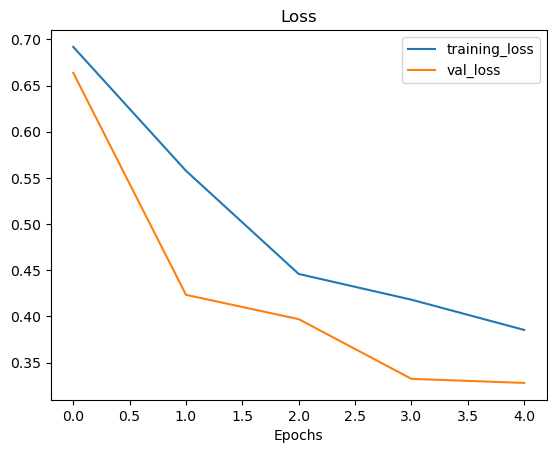

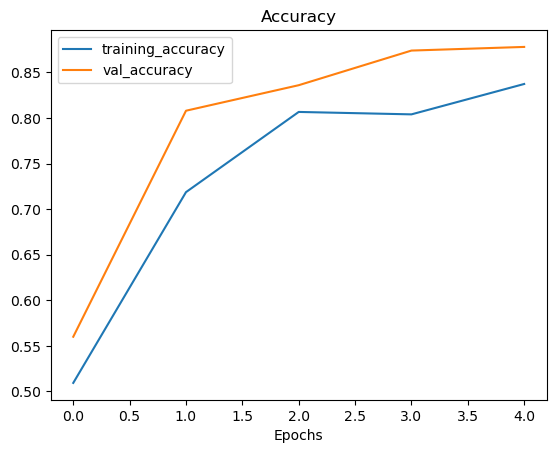

In [43]:
# Vẽ loss curve của kết quả model_5
plot_loss_curves(history_5)

Chúng ta có thể thấy các training curve tiến gần hơn với nhau. Tuy nhiên, validation loss có vẻ bắt đầu tăng dần về cuối và có khả năng dẫn tới overfitting.

Đã đến lúc tìm hiểu kỹ về các thủ thuật và thử một phương pháp phòng ngừa overfitting, tăng cường dữ liệu khác.

Trước tiên, chúng ta sẽ xem cách thực hiện điều này với code rồi thảo luận về những gì nó đang thực hiện.

Chúng ta sẽ khởi tạo lại instance [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) để triển khai tăng cường dữ liệu.

In [44]:
# Tạo ImageDataGenerator training instance với data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # xoay hình một chút trong khoảng 0-20 độ (lưu ý: đây là int, không phải float)
                                             shear_range=0.2, # cắt ảnh
                                             zoom_range=0.2, # phóng to ảnh
                                             width_shift_range=0.2, # dịch chuyển ảnh theo chiều rộng
                                             height_shift_range=0.2, # dịch chuyển ảnh theo chiều cao
                                             horizontal_flip=True) # lật ảnh trên trục hoành

# Tạo ImageDataGenerator training instance mà không có data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Tạo ImageDataGenerator test instance mà không có data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Câu hỏi:** Data augmentation (Tăng cường dữ liệu) là gì?

**Data augmentation** là quá trình thay đổi dữ liệu huấn luyện, làm cho nó đa dạng hơn và cho phép mô hình học nhiều pattern có thể khái quát hơn. Thay đổi có thể là điều chỉnh xoay, lật, cắt ảnh,...
 
Việc này sẽ mô phỏng kiểu dữ liệu mà mô hình sử dụng trong thực tế.

Nếu chúng ta xây dựng ứng dụng pizza vs. steak, không phải toàn bộ hình ảnh mà người dùng lấy sẽ có thiết lập tương tự với dữ liệu huấn luyện. Tăng cường dữ liệu cho chúng ta một cách khác để ngừa overfitting và giúp mô hình khái dễ quát hóa hơn.

> 🔑 **Lưu ý:** Tăng cường dữ liệu thường chỉ được thực hiện trên dữ liệu huấn luyện. Nhờ các tham số tăng cường dữ liệu được tích hợp của`ImageDataGenerator, hình ảnh được giữ nguyên như khi ở directory nhưng chúng sẽ được thao tác ngẫu nhiên khi đưa vào mô hình.

In [45]:
# Import dữ liệu và tăng cường nó từ training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Không xáo trộn cho mục đích mô phỏng

# Tạo các non-augmented data batch
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Không xáo trộn cho mục đích mô phỏng

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Hãy xem tăng cường dữ liệu trông như thế nào?

(phương châm của chúng ta là trực quan hóa...)

In [46]:
# Lấy mẫu data batch
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Lưu ý: các nhãn không được tăng cường, chúng vẫn giữ nguyên

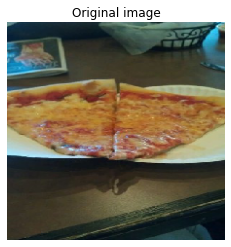

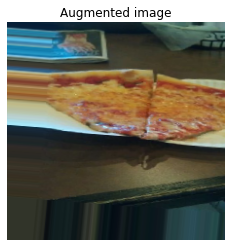

In [ ]:
# Hiển thị hình ảnh ban đầu và hình ảnh đã tăng cường
random_number = random.randint(0, 32) # chúng ta đang tạo batch có size 32 để lấy instance ngẫu nhiên
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Sau khi xem qua mẫu hình ảnh ban đầu và hình đã tăng cường, bạn có thể bắt đầu  xem một số mẫu biến đổi trên hình ảnh huấn luyện.

Lưu ý hình ảnh đã tăng cường trông hơi giống phiên bản biến dạng của hình ảnh ban đầu. Điều này nghĩa là mô hình sẽ bị buộc thử học các pattern trong các hình kém hoàn hảo, điều này thường xảy ra khi sử dụng hình ảnh thực tế.

> 🤔 **Câu hỏi:** Chúng ta có nên sử dụng tăng cường dữ liệu không? Và nên sử dụng từng nào?

Tăng cường dữ liệu là một cách phòng trừ mô hình bị overfitting. Nếu mô hình bị overfitting (chẳng hạn: validation loss tiếp tục gia tăng) thì có lẽ bạn sẽ cần tăng cường dữ liệu. 

Còn về nên tăng cường bao nhiêu, không có thông lệ cố định nào cho điều này. Tốt nhất là kiểm tra xác lựa chọn trong class `ImageDataGenerator` và nghĩ xem mô hình trong trường hợp đó sẽ đạt được lợi ích gì từ tăng cường dữ liệu.

Chúng ta đã có dữ liệu được tăng cường, hãy thử khớp lại mô hình và xem nó ảnh hưởng thế nào tới việc huấn luyện.

Chúng ta sẽ dùng mô hình tương tự `model_5`.

In [47]:
# Tạo mô hình (tương tự model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # giảm một nửa số lượng đặc trưng
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Khớp mô hình
history_6 = model_6.fit(train_data_augmented, # thay đổi thành dữ liệu huấn luyện đã tăng cường
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

2022-10-10 17:01:25.395004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 20 of 47
2022-10-10 17:01:35.127180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 39 of 47
2022-10-10 17:01:39.395007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 47 steps, validate for 16 steps
Epoch 1/5


2022-10-10 17:01:51.117239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 19 of 47
2022-10-10 17:02:01.376660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 39 of 47
2022-10-10 17:02:05.571210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


 1/47 [..............................] - ETA: 21:10

> 🤔 **Câu hỏi:** Tại sao mô hình không đạt được kết quả tốt trên tập dữ liệu khi bắt đầu?

Do khi tạo `train_data_augmented`, chúng ta đã tắt xáo trộn dữ liệu với `shuffle=False`, khiến mô hình chỉ thấy một batch của kiểu hình ảnh duy nhất tại một thời điểm.

Ví dụ: lớp pizza được load trước tiên vì nó là lớp đầu tiên. Do đó, chất lượng của nó chỉ được đo trên một lớp duy nhất chứ không phải cả hai lớp. Chất lượng dữ liệu kiểm định cải thiện nhanh chóng vì nó chứa dữ liệu đã xáo trộn.

Vì chúng ta chỉ thiết lập `shuffle=False` cho mục đích mô phỏng (do đó có thể vẽ cùng một hình ảnh đã tăng cường hoặc không được tăng cường) nên chúng ta có thể chỉnh sửa bằng cách đặt `shuffle=True` trên các bộ sinh dữ liệu tương lai.

Bạn cũng có thể nhận thấy mỗi epoch tốn thời gian lâu hơn khi huấn luyện với dữ liệu đã tăng cường so với dữ liệu không tăng cường ( ~25 giây mỗi epoch với ~10 giây mỗi epoch).

Đó là do instance `ImageDataGenerator` tăng cường dữ liệu khi nó được đưa vào mô hình. Lợi ích của điều này là nó giữ nguyên các hình ảnh ban đầu. Nhược điểm là nó mất nhiều thời gian load hơn.

> 🔑 **Lưu ý:** Phương pháp khả thi để tăng tốc thao tác với tập dữ liệu là xem xét [các lựa chọn parrallel read và buffered prefetching của TensorFlow](https://www.tensorflow.org/tutorials/images/data_augmentation).

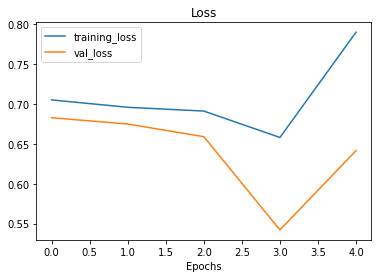

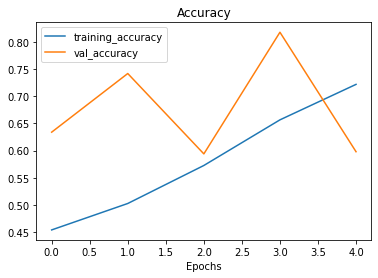

In [ ]:
# Kiểm tra lịch sử chất lượng mô hình huấn luyện trên dữ liệu đã tăng cường
plot_loss_curves(history_6)

Có vẻ validation loss curve đang đi đúng hướng nhưng nó hơi tăng một chút (loss curve lý tưởng nhất là không quá nhọn nhưng là một đường dốc trơn, tuy nhiên loss curve trơn hoàn hảo chỉ có trong tưởng tượng.

Hãy xem điều gì sẽ xảy ra nếu chúng ta xáo trộn dữ liệu huấn luyện đã tăng cường.

In [ ]:
# Import dữ liệu và tăng cường từ directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Xáo trộn dữ liệu (mặc định)

Found 1500 images belonging to 2 classes.


In [ ]:
# Tạo mô hình (tương tự model_5 và model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Khớp mô hình
history_7 = model_7.fit(train_data_augmented_shuffled, # dữ liệu được tăng cường đã bị xáo trộn
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 472ms/step - loss: 0.6233 - accuracy: 0.6513 - val_loss: 0.4756 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5050 - accuracy: 0.7593 - val_loss: 0.3754 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4905 - accuracy: 0.7660 - val_loss: 0.3571 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4900 - accuracy: 0.7700 - val_loss: 0.3611 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4507 - accuracy: 0.7993 - val_loss: 0.3718 - val_accuracy: 0.8180


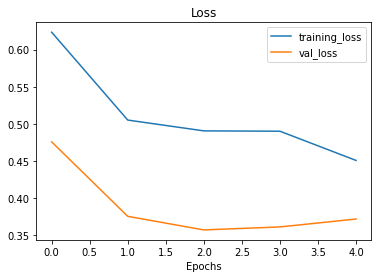

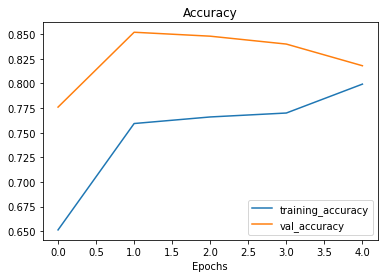

In [ ]:
# Kiểm tra lịch sử chất lượng mô hình huấn luyện trên dữ liệu đã tăng cường
plot_loss_curves(history_7)

Lưu ý cách `model_7` cải thiện chất lượng trên tập huấn luyện gần như ngay lập tức so với `model_6`. Đó là do chúng ta đã xáo trộn dữ liệu huấn luyện khi truyền nó vào mô hình với tham số `shuffle=True` trong phương thức `flow_from_directory`.

Điều này có nghĩa là mô hình có thể thấy các mẫu của cả hình ảnh pizza và bít-tết ở mỗi batch và lần lượt đánh giá về những thứ mà nó học được từ cả 2 loại hình ảnh hơn là 1 loại.

Loss curve trông cũng trơn tru hơn với dữ liệu đã xáo trộn (so sánh `history_6` với `history_7`).

### 7. Lặp lại cho đến khi đạt yêu cầu

Chúng ta đã huấn luyện một vài mô hình trên tập dữ liệu và cho đến giờ chúng đang hoạt động khá tốt.
 
Do đã vượt qua baseline nên chúng ta có thể thử một số thứ để cải thiện mô hình:
* Tăng số tầng của mô hình (chẳng hạn: thêm tầng tích chập).
* Tăng số bộ lọc ở mỗi tầng tích chập (ví dụ: từ 10 lên 32, 64 hoặc 128; những số này không được thiết lập sẵn, chúng thường được tìm thấy thông qua thử nghiệm và sai sót).
* Huấn luyện lâu hơn (nhiều epoch hơn).
* Tìm tốc độ học lý tưởng.
* Lấy nhiều dữ liệu hơn (mô hình có nhiều cơ hội học hơn).
* Sử dụng **transfer learning** để tận dụng mô hình hình ảnh khác đã học và điều chỉnh nó để sử dụng cho trường hợp của mình.

Việc điều chỉnh các thiết lập trên (trừ 2 điều cuối) trong quá trình phát triển mô hình thường được coi là **điều chỉnh siêu tham số**.

Bạn có thể coi điều chỉnh siêu tham số giống như việc điều chỉnh các thiết lập của lò vi sóng để nấu ăn. Dù lò vi sóng hầu hết sẽ nấu giúp bạn, bạn vẫn có thể giúp nó chỉnh số.

Hãy quay lại chỗ chúng ta bắt đầu và thử mô hình ban đầu (`model_1` hay kiến trúc TinyVGG từ [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [ ]:
# Tạo mô hình CNN (giống như Tiny VGG nhưng cho phân loại nhị phân - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # input shape tương tự như hình ảnh của chúng ta 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Khớp mô hình
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 37s 753ms/step - loss: 0.6479 - accuracy: 0.6267 - val_loss: 0.5632 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5612 - accuracy: 0.7307 - val_loss: 0.4197 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5459 - accuracy: 0.7393 - val_loss: 0.3961 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5115 - accuracy: 0.7607 - val_loss: 0.3879 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5123 - accuracy: 0.7573 - val_loss: 0.3865 - val_accuracy: 0.8360


> 🔑 **Lưu ý:** Bạn có thể nhận thấy chúng ta đã dừng một số code hơi khác để xây dụng `model_8` so với `model_1`. Điều này là do những phần mà chúng ta đã import trước đó như `from tensorflow.keras.layers import Conv2D` giảm lượng code mà chúng ta cần viết. Mặc dù code khác nhau nhưng kiến trúc vẫn tương tự.

In [ ]:
# Kiểm tra kiến trúc của model_1 (tương tự model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Kiểm tra kiến trúc của model_8 (tương tự model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

Giờ hãy kiểm tra chất lượng mô hình TinyVGG.

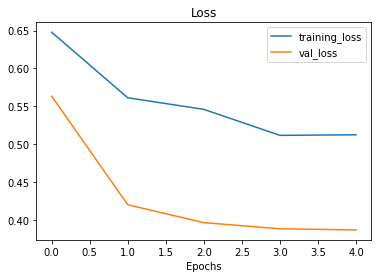

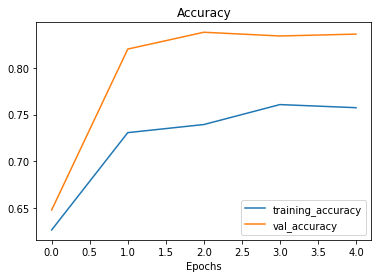

In [ ]:
# Kiểm tra chất lượng mô hình TinyVGG
plot_loss_curves(history_8)

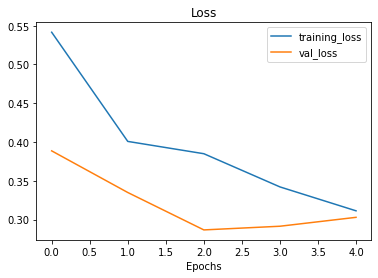

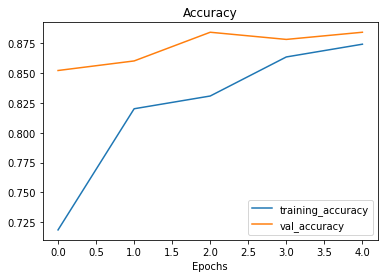

In [ ]:
# Training curve này trông như thế nào so với cái ở trên?
plot_loss_curves(history_1)

Training curve trông khá tốt nhưng chất lượng mô hình trên tập huấn luyện và kiểm tra không cải thiện nhiều so với mô hình trước.

Hãy quan sát các training curve khác, có vẻ chất lượng của mô hình sẽ cải thiện nếu chúng ta huấn luyện nó lâu hơn một chút (nhiều epoch hơn). 

Có lẽ bạn sẽ muốn thử làm như vậy.

### Dự đoán với mô hình đã huấn luyện

Mô hình đã huấn luyện có lợi ích gì nếu chúng ta không đưa ra dự đoán với nó?

Để thực sự kiểm tra, chúng ta sẽ upload một số hình ảnh của riêng mình và xem mô hình xử lý thế nào.

Trưóc tiên, hãy nhắc lại tên lớp và xem hình mà chúng ta sẽ kiểm tra.

In [ ]:
# Các lớp mà chúng ta đang làm việc
print(class_names)

['.DS_Store' 'pizza' 'steak']


Hình kiểm tra đầu tiên mà chúng ta sẽ dùng là [món bít-tết](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg) mà tôi đã nấu.

--2021-07-14 06:11:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2021-07-14 06:11:00 (193 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



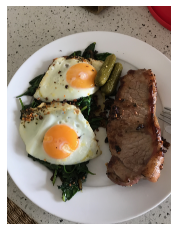

In [ ]:
# Xem hình ảnh ví dụ
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Kiểm tra shape của ảnh
steak.shape

(4032, 3024, 3)

Do mô hình lấy ảnh có shape `(224, 224, 3)` nên chúng ta phải reshape hình ảnh tùy chỉnh để sử dụng nó với mô hình.

Để thực hiện, chúng ta có thể import và giải mã hình ảnh bằng [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (để đọc file) và [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (để resize ảnh và biến nó thành tensor).

> 🔑 **Lưu ý:** Với mô hình đưa ra dự đoán trên dữ liệu chưa gặp bao giờ, chẳng hạn: hình ảnh tùy chỉnh phải có shape tương tự như mô hình đã huấn luyện. Tổng quát hơn, để đưa ra dự đoán trên dữ liệu tùy chỉnh, nó phải có cùng dạng mà mô hình được huấn luyện.

In [ ]:
# Tạo hàm import hình ảnh và resize nó để sử dụng với mô hình
def load_and_prep_image(filename, img_shape=224):
  """
  Đọc ảnh từ tên file, biến nó thành tensor
  và reshape nó thành (img_shape, img_shape, colour_channel).
  """
  # Đọc trong target file (hình ảnh)
  img = tf.io.read_file(filename)

  # Giải mã file đã đọc thành tensor & đảm bảo 3 kênh màu
  # (mô hình được huấn luyện trên ảnh có 3 kênh màu và đôi lúc ảnh có 4 kênh màu) 
  img = tf.image.decode_image(img, channels=3)

  # Resize ảnh (về cùng size mà mô hình được huấn luyện)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale ảnh (nhận tất cả các giá trị trong khoảng 0-1)
  img = img/255.
  return img

Chúng ta có đã một hàm để load ảnh tùy chỉnh, hãy load nó vào.

In [ ]:
# Load vào và tiền xử lý ảnh tùy chỉnh
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Tuyệt vời, hình ảnh của chúng ta ở định dạng tensor, đã đến lúc thử nó với mô hình!

In [ ]:
# Đưa ra dự đoán về hình ảnh tùy chỉnh (cảnh báo: điều này sẽ không hoạt động)
model_8.predict(steak)

ValueError: ignored

Còn một vấn đề nữa ...

Mặc dù hình ảnh của chúng ta có cùng shape với hình ảnh mà mô hình đã huấn luyện, chúng ta vẫn thiếu một dimension.

Còn nhớ cách mô hình của chúng ta được huấn luyện trong các batch như thế nào không?

Batch size trở thành dimension đầu tiên. 

Trên thực tế, mô hình được huấn luyện dựa trên dữ liệu ở dạng `(batch_size, 224, 224, 3)`.

Chúng ta có thể khắc phục điều này bằng cách thêm phần bổ sung vào image tensor tùy chỉnh, sử dụng [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
# Thêm một trục bổ sung
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # thêm một dimension bổ sung ở trục 0 
#steak = steak[tf.newaxis, ...] # thay thế cho ở trên, '...' là viết tắt của 'mọi dimension khác'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Hình ảnh tùy chỉnh có batch size là 1! Hãy đưa ra dự đoán về nó.

In [ ]:
# Đưa ra dự đoán về image tensor tùy chỉnh
pred = model_8.predict(steak)
pred

array([[0.73311806]], dtype=float32)

Các dự đoán xuất hiện dưới dạng **prediction probability (xác suất dự đoán)**. Nói cách khác, điều này có nghĩa là hình ảnh có thể là lớp này hay lớp khác.

Vì chúng ta đang làm việc với bài toán phân loại nhị phân, nếu xác suất dự đoán trên 0.5 thì theo mô hình, dự đoán rất có thể là **lớp positive** (lớp 1).

Còn nếu xác suất dự đoán dưới 0.5 thì theo mô hình, lớp dự đoán rất có thể là **lớp negative** (lớp 0).

> 🔑 **Lưu ý:** Mức giới hạn 0.5 có thể được điều chỉnh tùy ý. Ví dụ: chúng ta có thể đặt giới hạn là 0.8 trở lên cho lớp positive và 0.2 cho lớp negative. Tuy nhiên, điều này hầu như sẽ luôn thay đổi các phép đánh giá chất lượng của mô hình, vì vậy hãy đảm bảo chúng thay đổi theo đúng hướng.

Nhưng phải nói rằng lớp positive và negative không có nhiều ý nghĩa khi chúng ta thực hiện với pizza 🍕 và bít-tết 🥩 ...

Vì vậy, hãy viết một hàm nhỏ để chuyển đổi dự đoán thành tên lớp rồi vẽ hình ảnh mục tiêu.

In [ ]:
# Tự nhớ lại tên các lớp
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [ ]:
# Chúng ta có thể lập chỉ mục cho lớp được dự đoán bằng cách làm tròn xác suất dự đoán
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Import ảnh nằm ở filename, đưa ra dự đoán về ảnh đó với
  mô hình đã huấn luyện và vẽ hình ảnh với lớp đã dự đoán làm tiêu đề.
  """
  # Import ảnh mục tiêu và tiền xử lý nó
  img = load_and_prep_image(filename)

  # Đưa ra dự đoán
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Lấy tên lớp đã dự đoán
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Vẽ ảnh và lớp đã dự đoán
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

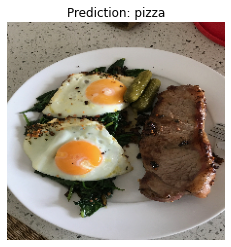

In [ ]:
# Kiểm tra mô hình trên ảnh tùy chỉnh
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Mô hình của chúng ta đã dự đoán đúng.

Nhược điểm duy nhất khi việc làm việc với thức ăn là nó khiến tôi thấy đói.

Hãy thử một hình ảnh nữa.

--2021-07-14 06:13:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2021-07-14 06:13:57 (162 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



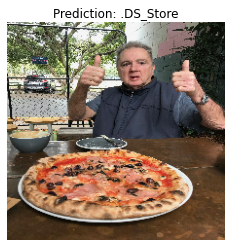

In [ ]:
# Download một ảnh kiểm tra khác và đưa ra dự đoán về nó
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

Rất tuyệt!

## Phân loại đa lớp

Chúng ta đã tham khảo kiến ​​trúc TinyVGG từ website CNN Explainer nhiều lần trong notebook này, tuy nhiên, website CNN Explainer hoạt động với 10 lớp ảnh khác nhau, trong khi mô hình hiện tại của chúng ta chỉ hoạt động với 2 lớp (pizza và bít-tết).

> 🛠 **Thực hành:** Trước khi cuộn xuống, bạn nghĩ sao về việc thay đổi mô hình để làm việc với 10 lớp ảnh cùng loại? Giả sử dữ liệu có cùng kiểu với bài toán hai lớp của chúng ta.

Còn nhớ nhớ các bước chúng ta đã thực hiện trước đây để xây dựng bộ phân loại pizza 🍕 với bít-tết không?

Chúng ta thực hiện lại các bước đó một lần nữa, ngoại trừ lần này, chúng ta sẽ làm việc với 10 loại thực phẩm khác nhau.

1. Làm quen với dữ liệu (visualize, visualize, visualize...)
2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)
3. Tạo mô hình (bắt đầu với baseline)
4. Khớp mô hình
5. Đánh giá mô hình
6. Điều chỉnh các tham số khác nhau và cải thiện mô hình (thử vượt qua baseline)
7. Lặp lại cho tới khi hài lòng

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*Quy trình mà chúng ta sắp trải qua là phiên bản được sửa đổi một chút của hình ảnh trên. Trong khi tiến hành xem xét các bài toán học sâu, các bạn sẽ thấy quy trình trên mang tính phác thảo hơn là hướng dẫn từng bước.* 

### 1. Import và làm quen với dữ liệu

Một lần nữa, chúng ta lấy tập hợp con của [tập dữ liệu Food101 dataset](https://www.kaggle.com/dansbecker/food-101). Ngoài các ảnh pizza và bít-tết, chúng ta còn có tám lớp ảnh khác.


In [ ]:
import zipfile

# Download file zip của ảnh 10_food_classes 
# Xem dữ liệu này được tại ra như thế nào - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Giải nén file đã the download
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-14 06:13:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   239MB/s    in 2.1s    

2021-07-14 06:13:59 (239 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Bây giờ, hãy kiểm tra tất cả các directory và sub-directory khác nhau trong file `10_food_classes`.

In [ ]:
import os

# Xem qua directory 10_food_classes và liệt kê số file
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

Trông tốt đấy!

Bây giờ chúng ta sẽ thiết lập các đường dẫn training/test directory.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Và lấy tên lớp từ các subdirectory.

In [ ]:
# Lấy tên lớp cho tập dữ liệu đa lớp
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Làm thế nào để hiển thị hình ảnh từ tập huấn luyện?

Image shape: (384, 512, 3)


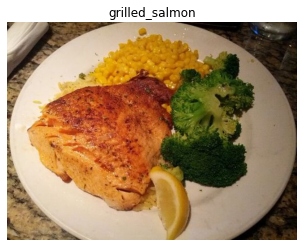

In [ ]:
# Xem ảnh ngẫu nhiên từ tập dữ liệu huấn luyện
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # lấy tên lớp ngẫu nhiên

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)
 
Sau khi xem qua một số hình ảnh (nên hiển thị ít nhất 10-100 mẫu khác nhau), có vẻ như các directory dữ liệu đã được thiết lập chính xác.

Đã đến lúc tiền xử lý dữ liệu.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale dữ liệu và tạo các data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load dữ liệu từ các directory và biến nó thành các batch
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # thay thành categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Như với phân loại nhị phân, chúng ta đã tạo các image generator. Thay đổi chính lần này là đổi tham số `class_mode` thành `'categorical'` vì chúng ta đang xử lý 10 lớp hình ảnh thực phẩm.

Mọi thứ khác như thay co giãn ảnh, tạo kích thước batch và kích thước ảnh mục tiêu vẫn giữ nguyên.

> 🤔 **Câu hỏi:** Tại sao kích thước hình ảnh là 224x224? Chúng ta có thể chọn bất kỳ kích thước nào nếu muốn, tuy nhiên, 224x224 là kích thước vô cùng phổ biến cho việc tiền xử lý hình ảnh. Việc sử dụng hình ảnh lớn hơn hoặc nhỏ hơn sẽ tùy thuộc vào bài toán.

### 3. Tạo mô hình (bắt đầu với baseline)

Chúng ta có thể sử dụng cùng một mô hình (TinyVGG) trong bài toán phân loại nhị phân cho bài toán phân loại đa lớp với một vài chỉnh sửa nhỏ.

Cụ thể:
* Thay đổi layer đầu ra thành 10 nơ-ron đầu ra (số lớp tương tự với số lớp chúng ta có).
* Thay đổi layer đầu ra để sử dụng kích hoạt `'softmax'` thay vì kích hoạt `'sigmoid'`.
* Thay đổi hàm mất mát thành `'categorical_crossentropy'` thay vì `'binary_crossentropy'`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Tạo mô hình (bản clone của model_8, trừ việc là mô hình đa lớp)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # thay đổi thành 10 nơ-ron (tương tự như số lớp) và kích hoạt 'softmax'
])

# Biên dịch mô hình
model_9.compile(loss="categorical_crossentropy", # thay thành categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Khớp mô hình

Bây giờ chúng ta đã có một mô hình phù hợp để thao tác với nhiều lớp, hãy khớp với dữ liệu.

In [ ]:
# Khớp mô hình
history_9 = model_9.fit(train_data, # giờ là 10 lớp khác nhau
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 192ms/step - loss: 2.2776 - accuracy: 0.1369 - val_loss: 2.2468 - val_accuracy: 0.1804
Epoch 2/5
235/235 [==============================] - 43s 185ms/step - loss: 2.1532 - accuracy: 0.2181 - val_loss: 2.1431 - val_accuracy: 0.2500
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.7899 - accuracy: 0.3923 - val_loss: 2.0544 - val_accuracy: 0.2948
Epoch 4/5
235/235 [==============================] - 43s 185ms/step - loss: 1.1089 - accuracy: 0.6327 - val_loss: 2.5314 - val_accuracy: 0.2708
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.4284 - accuracy: 0.8653 - val_loss: 3.7439 - val_accuracy: 0.2484


Tại sao mỗi epoch tốn nhiều thời gian hơn so với khi chỉ làm việc với hai lớp ảnh?

Đó là vì chúng ta đang xử lý nhiều hình ảnh hơn trước. Chúng ta có 10 lớp với 750 hình ảnh huấn luyện và 250 hình ảnh kiểm định, mỗi lớp có tổng số 1000 ảnh. Khi chúng ta có hai lớp, 1500 hình ảnh huấn luyện và 500 hình ảnh kiểm định, tổng cộng là 2000 ảnh.

Lý do trực quan ở đây là chúng ta càng có nhiều dữ liệu, thì mô hình sẽ càng mất nhiều thời gian hơn để tìm pattern.

### 5. Đánh giá mô hình

Tuyệt! Chúng ta vừa huấn luyện một mô hình trên 10 lớp hình ảnh thực phẩm khác nhau, hãy xem nó diễn ra như thế nào.

In [ ]:
# Đánh giá trên dữ liệu kiểm tra
model_9.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.7439 - accuracy: 0.2484


[3.7439136505126953, 0.2484000027179718]

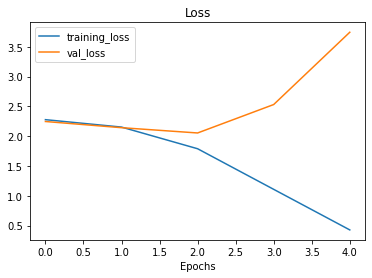

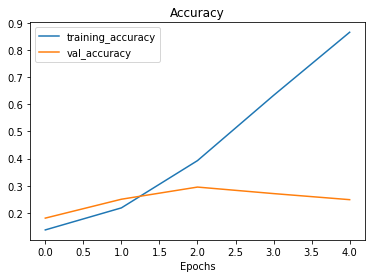

In [ ]:
# Kiểm tra các loss curve của mô hình trên 10 lớp dữ liệu (lưu ý: hàm này ở phía trên trong notebook)
plot_loss_curves(history_9)

Khoảng cách giữa training loss curve và validation loss curve khá lớn.

Điều này cho thấy điều gì?

Có vẻ như mô hình đang **quá khớp** khá tệ với tập huấn luyện. Nói cách khác, nó nhận được kết quả tốt trên dữ liệu huấn luyện nhưng không tổng quát hóa tốt đối với dữ liệu chưa biết và hoạt động kém trên dữ liệu kiểm tra.

### 6. Điều chỉnh tham số của mô hình

Theo chất lượng của mô hình trên dữ liệu huấn luyện, rõ ràng là mô hình của chúng ta đang học được điều gì đó. Tuy nhiên, thực hiện tốt dữ liệu huấn luyện cũng giống như việc học tốt trên lớp mà không vận dụng được các kỹ năng trong đời sống thực.

Lý tưởng nhất là mô hình hoạt động tốt trên dữ liệu kiểm tra cũng như dữ liệu huấn luyện.

Vì vậy, các bước tiếp theo sẽ là thử và ngăn mô hình khỏi bị overfitting. Một số cách để ngăn ngừa overfitting là:

- **Lấy nhiều dữ liệu hơn** - Có nhiều dữ liệu hơn mang lại cho mô hình nhiều cơ hội hơn để tìm hiểu các pattern, những pattern nào khái quát hơn với các mẫu mới.
- **Đơn giản hóa mô hình** - Nếu mô hình hiện tại đã quá khớp dữ liệu huấn luyện thì mô hình đó quá phức tạp. Điều này có nghĩa là nó học các pattern của dữ liệu quá tốt và không thể khái quát hóa tốt cho dữ liệu chưa từng thấy. Một cách để đơn giản hóa mô hình là giảm số layer mà nó sử dụng hoặc giảm số đơn vị ẩn ở mỗi layer.
- **Sử dụng data augmentation (tăng cường dữ liệu)** - Tăng cường dữ liệu thao tác dữ liệu huấn luyện theo cách làm mô hình khó học hơn vì nó bổ sung thêm nhiều dữ liệu một cách giả tạo. Nếu một mô hình có thể học các pattern trong dữ liệu được tăng cường, thì mô hình đó có thể khái quát hóa tốt hơn đối với dữ liệu chưa biết.
- **Sử dụng transfer learning** - Transfer learning tận dụng các pattern (trọng số đã huấn luyện trước) mà mô hình đã học làm nền tảng cho tác vụ của bạn. Trong trường hợp này, chúng ta có thể sử dụng mô hình thị giác máy tính đã huấn luyện trước trên nhiều hình ảnh rồi điều chỉnh một chút để chuyên biệt hơn cho hình ảnh thức ăn.

> 🔑 **Lưu ý:** Việc ngăn ngừa overfitting còn được gọi là **điều chuẩn**.

Nếu đã có tập dữ liệu sẵn có, có lẽ trước tiên chúng ta sẽ thử một tùy chọn hoặc kết hợp ba tùy chọn cuối cùng ở trên.

Vì thu thập nhiều dữ liệu hơn sẽ cần lấy nhiều ảnh thực phẩm theo cách thủ công, hãy thử những cách chúng ta có thể làm ngay trong notebook.

Sao chúng ta không đơn giản hóa mô hình trước?

Để làm như vậy, chúng ta sẽ loại bỏ hai trong số các layer tích chập, lấy tổng số layer tích chập từ bốn đến hai.

In [ ]:
# Hãy thử mô hình đơn giản hóa (loại bỏ hai layer)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 175ms/step - loss: 2.1487 - accuracy: 0.2540 - val_loss: 1.9855 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 41s 174ms/step - loss: 1.8072 - accuracy: 0.3792 - val_loss: 1.9812 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 42s 177ms/step - loss: 1.4728 - accuracy: 0.5164 - val_loss: 1.9150 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 41s 176ms/step - loss: 1.0023 - accuracy: 0.6824 - val_loss: 2.1659 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 41s 177ms/step - loss: 0.5737 - accuracy: 0.8291 - val_loss: 2.6703 - val_accuracy: 0.2892


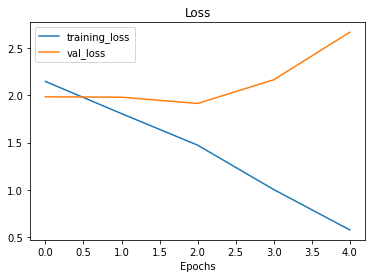

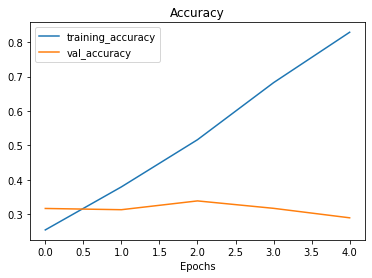

In [ ]:
# Kiểm tra loss curve của model_10
plot_loss_curves(history_10)

Ngay cả với mô hình đơn giản hóa, có vẻ như mô hình của chúng ta vẫn đang bị quá khớp dữ liệu huấn luyện.

Chúng ta còn có thể thử những gì khác?

**Tăng cường dữ liệu** thì sao?

Tăng cường dữ liệu khiến mô hình khó học hơn trên dữ liệu huấn luyện và do đó, làm cho các pattern mà nó học được trở nên khái quát hơn đối với dữ liệu chưa biết.

Để tạo dữ liệu tăng cường, chúng ta sẽ tạo lại instance [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) mới, lần này sẽ thêm một số tham số như `rotation_range` và `horizontal_flip` để thao tác với ảnh.

In [ ]:
# Tạo augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # lưu ý: đây là số nguyên, không phải float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Bây giờ chúng ta đã có dữ liệu tăng cường, hãy xem nó hoạt động như thế nào với cùng một mô hình như trước (`model_10`).

Thay vì viết lại mô hình từ đầu, chúng ta có thể clone nó bằng hàm tiện ích [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) trong TensorFlow: lấy một mô hình hiện có và xây dựng lại ở cùng một định dạng.

Phiên bản clone sẽ không bao gồm bất kỳ trọng số (pattern) nào mà mô hình ban đầu đã học. Vì vậy, huấn luyện nó sẽ giống như huấn luyện một mô hình từ đầu.

> 🔑 **Lưu ý:** Một trong những cách luyện tập chính trong DL và ML nói chung là **liên tiếp thử nghiệm**. Đó là những gì chúng ta đang thực hiện ở đây: thử thứ gì đó, xem xét liệu nó có hiệu quả không, sau đó thử cái khác. Thiết lập thử nghiệm tốt sẽ theo dõi những thứ chúng ta thay đổi, đó là lý do tại sao chúng ta đang sử dụng cùng một mô hình như trước nhưng với dữ liệu khác. Mô hình vẫn giữ nguyên nhưng dữ liệu thay đổi, điều này sẽ cho chúng ta biết liệu dữ liệu huấn luyện được tăng cường có bất kỳ ảnh hưởng nào đến chất lượng hay không.

In [ ]:
# Clone mô hình (sử dụng kiến trúc tương tự)
model_11 = tf.keras.models.clone_model(model_10)

# Biên dịch mô hình đã clone (thiết lập tương tự như trong model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_11 = model_11.fit(train_data_augmented, # sử dụng dữ liệu đã tăng cường
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 446ms/step - loss: 2.2657 - accuracy: 0.1693 - val_loss: 2.0938 - val_accuracy: 0.2512
Epoch 2/5
235/235 [==============================] - 104s 444ms/step - loss: 2.1007 - accuracy: 0.2479 - val_loss: 1.9478 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0377 - accuracy: 0.2851 - val_loss: 1.9241 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 104s 444ms/step - loss: 1.9937 - accuracy: 0.3097 - val_loss: 1.8455 - val_accuracy: 0.3736
Epoch 5/5
235/235 [==============================] - 104s 443ms/step - loss: 1.9476 - accuracy: 0.3291 - val_loss: 1.8203 - val_accuracy: 0.3664


Có thể thấy mỗi epoch tốn nhiều thời gian hơn so với mô hình trước đó. Điều này là do dữ liệu đang được tăng cường nhanh chóng trên CPU khi nó được load lên GPU, do đó tăng lượng thời gian giữa mỗi epoch.

Các training curve của mô hình trông như thế nào?

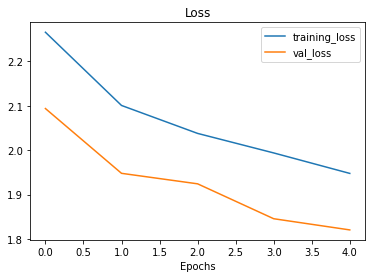

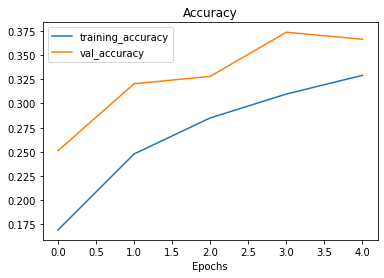

In [ ]:
# Kiểm tra chất lượng của mô hình với dữ liệu đã tăng cường
plot_loss_curves(history_11)

Trông tốt hơn nhiều rồi, các loss curve đã gần với nhau hơn. Mặc dù mô hình không hoạt động tốt trên tập huấn luyện đã tăng cường, nhưng nó hoạt động tốt hơn nhiều trên tập dữ liệu kiểm định.

Có vẻ như nếu chúng ta huấn luyện nó lâu hơn (nhiều epoch hơn) thì các phép đo đánh giá có thể tiếp tục cải thiện.

### 7. Lặp lại cho tới khi hài lòng

Chúng ta có thể tiếp tục: cơ cấu lại kiến trúc mô hình, thêm nhiều layer hơn, thử, điều chỉnh learning rate, thử, thử các phương pháp tăng dữ liệu khác nhau, huấn luyện lâu hơn. Nhưng các bạn có thể hình dung, điều này sẽ tốn khá nhiều thời gian.

Vẫn còn một mẹo mà chúng ta chưa thử, đó là **transfer learning**.

Tuy nhiên, chúng ta sẽ lưu điều đó cho notebook tiếp theo: thay vì thiết kế mô hình từ đầu, chúng ta sẽ tận dụng các pattern mà một mô hình khác đã học được cho tác vụ của chúng ta.

Trong lúc đó, hãy đưa ra dự đoán với mô hình đa lớp đã huấn luyện.

## Đưa ra dự đoán với mô hình đã huấn luyện

Mô hình có tốt đến đâu nếu chúng ta không thể đưa ra dự đoán cho nó?

Đầu tiên, hãy tự nhớ lại các lớp mà mô hình đa lớp đã huấn luyện, sau đó chúng ta sẽ download một số hình ảnh tùy chỉnh để làm việc.

In [ ]:
# Mô hình đã huấn luyện trên những lớp nào?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Bây giờ hãy lấy một số hình ảnh tùy chỉnh.

Nếu đang sử dụng Google Colab, bạn cũng có thể upload một số hình ảnh của riêng mình qua tab files.

In [ ]:
# -q là "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Chúng ta có một số hình ảnh tùy chỉnh để thử, hãy sử dụng hàm `pred_and_plot`  để đưa ra dự đoán với `model_11` trên một trong các hình ảnh và vẽ biểu đồ.

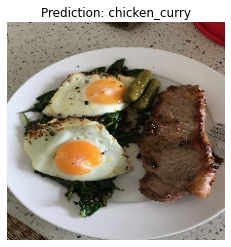

In [ ]:
# Đưa ra dự đoán sử dụng model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Có vẻ như mô hình của chúng ta đã dự đoán sai, hãy thử một ảnh khác.

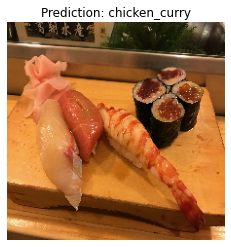

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

Một lần nữa, nó dự đoán là `chicken_curry` vì một số lý do.

Hãy thử thêm một một ảnh nữa.

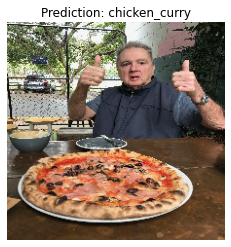

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

Lại là `chicken_curry`? Chắc có gì đó trục trặc...

Tôi nghĩ rằng có vấn đề với hàm `pred_and_plot` của chúng ta.

Hãy đưa ra dự đoán mà không dùng hàm và xem nó gặp vấn đề ở đâu.

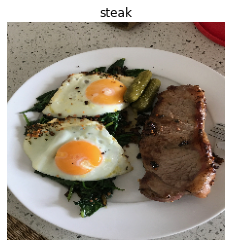

In [ ]:
# Load vào và tiền xử lý ảnh tùy chỉnh
img = load_and_prep_image("03-steak.jpeg")

# Đưa ra dự đoán
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Ghép lớp dự đoán với xác suất dự đoán cao nhất
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Tốt hơn nhiều rồi! Vấn đề chắc nằm ở hàm `pred_and_plot`.

Tôi nghĩ tôi biết vấn đề này là gì.

Hàm `pred_and_plot` được thiết kế để sử dụng với các mô hình phân loại nhị phân trong khi mô hình hiện tại của chúng ta là mô hình phân loại đa lớp.

Khác biệt chính nằm ở đầu ra của hàm `predict`.

In [ ]:
# Kiểm tra đầu ra của hàm predict
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.03887467, 0.15843102, 0.03170868, 0.1488752 , 0.0594982 ,
        0.04778374, 0.06917461, 0.04166124, 0.27236295, 0.13162972]],
      dtype=float32)

Vì mô hình có hàm kích hoạt `'softmax'` và 10 nơ-ron đầu ra nên nó đưa ra xác suất dự đoán cho mỗi lớp trong mô hình.

Lớp có xác suất cao nhất được mô hình cho là chứa hình ảnh.

Chúng ta có thể tìm chỉ mục giá trị lớn nhất bằng cách sử dụng [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), sau đó sử dụng nó để lập chỉ mục danh sách `class_names` để xuất ra lớp được dự đoán.

In [ ]:
# Tìm tên lớp đã dự đoán
class_names[pred.argmax()]

'steak'

Biết được điều này, chúng ta có thể điều chỉnh hàm `pred_and_plot` để làm việc với nhiều lớp cũng như các lớp nhị phân.

In [ ]:
# Điều chỉnh hàm để làm việc với nhiều lớp
def pred_and_plot(model, filename, class_names):
  """
  Import ảnh trong filename, đưa ra dự đoán về nó với
  mô hình đã huấn luyện và vẽ ảnh với lớp đã dự đoán làm tiêu đề.
  """
  # Import ảnh mục tiêu và tiền xử lý nó
  img = load_and_prep_image(filename)

  # Đưa ra dự đoán
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Lấy tên lớp đã dự đoán
  if len(pred[0]) > 1: # kiểm tra cho nhiều lớp
    pred_class = class_names[pred.argmax()] # nếu có nhiều hơn một đầu ra, lấy giá trị lớn nhất
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # nếu chỉ có một đầu ra, làm tròn

  # Vẽ ảnh và lớp đã dự đoán
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Hãy thử. Nếu chúng ta làm đúng, thì việc sử dụng các hình ảnh khác nhau sẽ dẫn đến các kết quả khác nhau (thay vì lần nào cũng là `chicken_curry`).

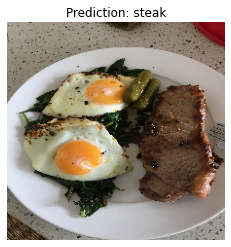

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

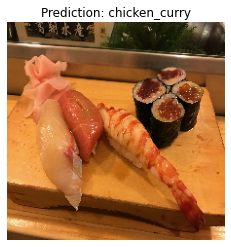

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

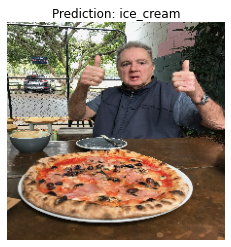

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

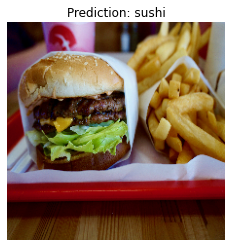

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Dự đoán của mô hình không tốt lắm, do nó chỉ hoạt động với độ chính xác ~35% trên tập dữ liệu kiểm tra.

## Lưu và load mô hình

Sau khi huấn luyện mô hình, chúng ta hãy lưu nó lại và load nó ở đâu đó.

Để thực hiện, hãy dùng các hàm [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) và [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load).

In [ ]:
# Lưu mô hình
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load và đánh giá mô hình
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8203 - accuracy: 0.3664


[1.8202669620513916, 0.36640000343322754]

In [ ]:
# So sánh kết quả của mô hình chưa lưu (giống như ở trên)
model_11.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 1.8203 - accuracy: 0.3664


[1.8202663660049438, 0.36640000343322754]

## 🛠 Bài tập thực hành 
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Dành 20 phút để đọc và tương tác với [website CNN explainer](https://poloclub.github.io/cnn-explainer/).
 * Có những thuật ngữ chính nào? Ví dụ: tự giải thích về convolution, pooling

2. Thử quanh phần "understanding hyperparameters" trên website [CNN explainer](https://poloclub.github.io/cnn-explainer/) trong 10 phút.
  * Kernel size là gì?
  * Stride là gì?
  * Làm thế nào để điều chỉnh những thứ trên bằng TensorFlow code?

3. Lấy 10 bức ảnh về hai thứ khác nhau và xây dựng bộ phân loại hình ảnh CNN của riêng mình bằng các kỹ thuật mà chúng ta đã tạo ở đây.

4. Tìm learning rate lý tưởng cho mô hình mạng nơ-ron tích chập đơn giản trên tập dữ liệu có 10 lớp.

## 📖 Tài liệu đọc thêm

1. **Xem:** bài giảng [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3). Điều này sẽ giúp bạn hiểu hơn về mạng nơ-ron tích chập.

2. **Xem:** Tìm hiểu kỹ hơn về [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) với deeplearning.ai. Nếu bạn vẫn tò mò về lý do chúng ta sử dụng **batch** để huấn luyện mô hình, thì tổng quan kỹ thuật này sẽ giúp bạn giải đáp.

3. **Đọc:** các lưu ý [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/). Điều này sẽ giúp bạn một hiểu sâu hơn về các kiến trúc mạng nơ-ron tích chập mà chúng ta đang viết.

4. **Đọc:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). Tài liệu này đề cập tất cả các kiến thức toán học liên quan tới layer tích chập.

5. **Luyện tập code:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). Để hiểu sâu hơn về data augmentation với TensorFlow, hãy dành một hoặc hai giờ để đọc hết hướng dẫn này.